<a href="https://colab.research.google.com/github/git-ashiq/kaggle-titanic/blob/master/titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic: Machine Learning from Disaster**

#### **The Challenge:**

To build a predictive model for “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).














### **Steps:**
1.   Question or problem definition
2.   Data Collection
3.   Exploratory Data Analysis
4.   Feature Engineering
5.   Modelling
6.   Testing
7.   Submitting



---



### **1. Defining the problem statement**

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we need to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

**Let us first learn about the structure of the Titanic ship.**

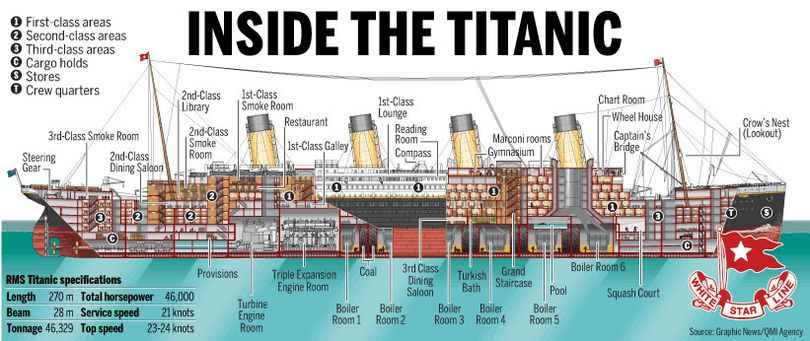

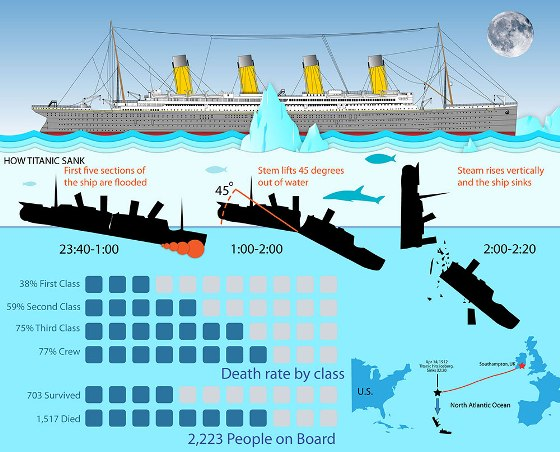

In [4]:
# To display the image in the notebook.
from IPython.display import Image, display
titanicship = ['https://i.pinimg.com/originals/74/ca/9e/74ca9e97625780b5d528a5f62110e1d8.jpg', 'http://www.infographicszone.com/wp-content/uploads/2012/10/the-RMS-titanic-1.jpg' ]

for ship in titanicship:
  display(Image(ship))
  print () 



---



### **2.Data Collection**

Collecting training and testing data from Kaggle.
you can download it from https://www.kaggle.com/c/titanic/data

##### **2.1 Google Colaboratory and Kaggle datasets API setup**

FYI: https://medium.com/@saedhussain/google-colaboratory-and-kaggle-datasets-b57a83eb6ef8

In [5]:
# Install Kaggle library
!pip install kaggle 

In [6]:
# Colab library to upload files to notebook
from google.colab import files

# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [8]:
# Download datasets for the Titanic challenge
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 24.3MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 27.0MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.10MB/s]


In [9]:
!ls

gender_submission.csv  sample_data  test.csv  train.csv


#### **2.2 Loading Libraries**

In [0]:
# Import Pandas for Data Manipulation and analyse
import pandas as pd

# Visulization library
import matplotlib.pyplot as plt
%matplotlib inline

#  Visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
sns.set() # setting seaborn as default for plots



In [0]:
# You can suppress all warnings:
import warnings
warnings.filterwarnings("ignore")

##### **2.3 Load train, test dataset using Pandas**

In [0]:
# Import Pandas to load datas

# Copy the path from files
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')



---



### **3.Exploratory Data Analysis**

In this stage, we will anaylze the data by following two methods and try to understand the patterns of the data.
*   Analyse by Describing data
*   Analyse by Visualizing data

##### **3.1 Analyze by Describing data**
Data Dictionary, Data Types, Data Informations, Data Statistical Informations

In [13]:
# Print first five rows of dataset
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# To display the column names of the dataset 
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Data Dictionary**

Variable definition of the dataset.

1.   **PassengerId:** An unique index for passenger rows.
2.   **Survived:** Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.
3.  **Pclass:** Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.
4.   **Name:** Passenger's name with title."Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.
5.   **Sex:**	Passenger's sex. It's either Male or Female.
6.   **Age:** Passenger's age
7.   **Sibsp:**	# of siblings / spouses travelling with each passnager
8.   **Parch:**	# of parents / children  travelling with each passenger.
9.   **Ticket:**	Ticket number
10.   **Fare:**	Passenger fare
11.   **Cabin:**	Cabin number of the passenger
12.   **Embarked:**	Port from where the particular passenger was embarked/boarded	C = Cherbourg, Q = Queenstown, S = Southampton



**Data Types**

*   Nominal categorical features: Survived, Sex, and Embarked. 
*   Ordinal categorical features: Pclass.
*   Continous numerical features: Age, Fare.
*   Discrete numerical features: Sibsp, Parch.
*   Alphanumeric: Ticket, Cabin.
*   Typos: Name

> **Type summary**: Integer or floats:7 & Strings (object):5




---



**Data Informations:**

General Infomation about datasets

> **Cabin, Age, Embarked**  Features contain null or empty values in both training & test datasets


In [15]:
# Print the Information about the Datasets
train.info()
print('-'*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         41

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



---



**Data Statistical Information**

Statistical Information about the datasets

In [17]:
#To view some basic statistical details
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Distribution of Numerical value features across the samples:**

*   **Survival Rate** : Around 38% of passengers survived in the datasets
*   **Age Distribution**: 0.4 to 80 with avg of 29 (Nearly 20 % Null values)
*   **Sibsp**: Nearly 30% of the passengers had siblings or spouse
*   **Parch**: More than 75% of the passengers did not travel with Parents & Children
*   **Fare Range**: 0 to 512 USD with avg of 32 USD


In [18]:
#To view some basic statistical details for categorical features
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Chambers, Mr. Norman Campbell",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


**Distribution of Categorical value features across the samples:**

*   **Sex**: Two unique values, with 65 % Male passengers 
*   **Ticket**: 23% Duplicate values. Otherwise, same ticket number for group of passengers.
*   **Cabin**: More than 80% Null values. Alternatively several passengers shared a cabin.
*   **Embarked**: 3 Unique values, with 72 % of S

**To find the Percentage:** = ((frequency/total)x100) | 
 **Null values** = ((total-frequency)/total)x100)




---



#### **3.2 Anaylse by Pivoting feature**

Relationship between Features and Survival

In this section, we analyze relationship between different features with respect to Survival

Firstly, we will analyse the correlation of the survival with following features.

*   Categorical features with zero null values (Pclass, Sex)
*   Numerical features with zero null values (SibSp, Parch, Fare)



**Pclass vs Survival**

Higher class passengers have better survival chance. Survival rate = 62% in Pclass 1


In [19]:
# Pclass & Survival
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(['Survived'], ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


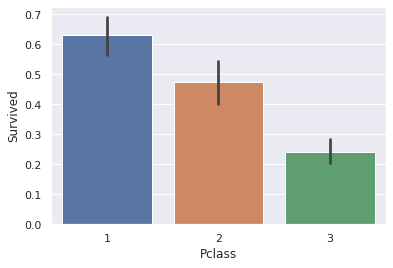

In [20]:
#train.groupby('Pclass').Survived.mean().plot(kind='bar')
sns.barplot(x='Pclass', y='Survived', data=train)



---



**Sex vs Survival**

Female passengers have better survival chance. Survival rate = 74%

In [21]:
# Sex & Survival
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(['Sex'], ascending=False)

,Sex,Survived
1,male,0.188908
0,female,0.742038


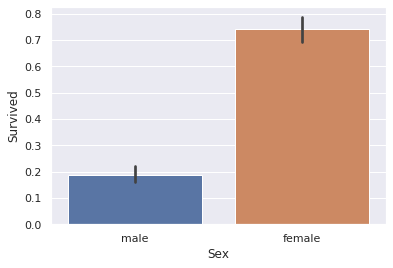

In [22]:
# train.groupby('Sex').Survived.mean().plot(kind='bar')
sns.barplot(x='Sex', y='Survived', data=train)



---



**Pclass & Sex vs Survival**

The Graph represents.

*   Female passenger from 1st and 2nd Pclass have almost 100% survival chance.
*   Male from 2nd and 3rd Pclass have only around 10% survival chance



In [23]:
# Pclass & Sex vs Survival
# Total numberof male & female passengers in each class

tab = pd.crosstab(train['Pclass'], train['Sex'])
print(tab)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

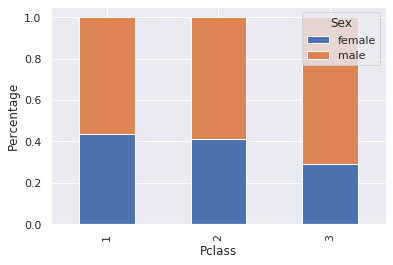

In [24]:
# Total number of male & female passengers percentage in each class

tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

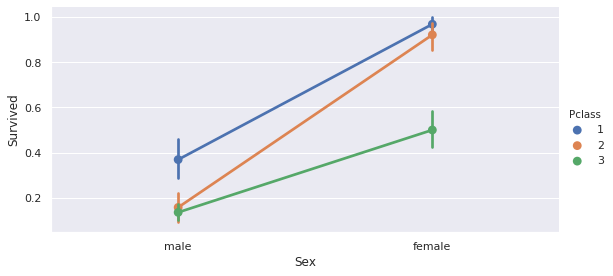

In [25]:
sns.factorplot('Sex', 'Survived', hue='Pclass', height=4, aspect=2, data=train)




---



**Embarked vs Survival**

Passenger embarked from 'C' have more than 50% survival chance.

In [26]:
# Counts of the passenger embarked 
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
# passenger Survived
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [29]:
# Mean of the passenger survived.
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


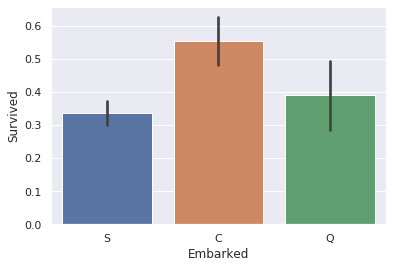

In [36]:
#train.groupby('Embarked').Survived.mean().plot(kind='bar')
sns.barplot(x='Embarked', y='Survived', data=train)



---



**Parch vs Survival**

Passenger have 1 or more parents or childern have more survival chance


In [37]:
# Counts of the Parents & children for passenger
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [38]:
# Passenger survived who have parents and children
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [39]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


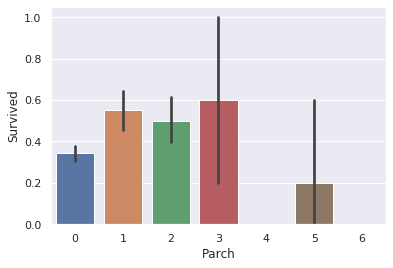

In [40]:
sns.barplot(x='Parch', y='Survived', data=train)



---



**Sibsp vs Survival**

Passenger have 1 or more Siblings have more survival chance

In [41]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [43]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [45]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


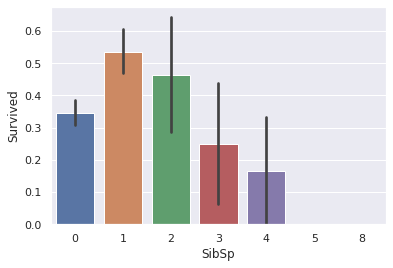

In [46]:
sns.barplot(x='SibSp', y='Survived', data=train)



---

